In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, TensorDataset

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [6]:
df = pd.read_csv(fr'C:\Users\ivane\Desktop\Dissertation\data\merged_data.csv')
df.head()

,Date,Open,Close,Change,sentiment,sentiment_score
0,2025-01-10,3761.549,3736.886,-0.66,0,0.700804
1,2024-12-19,3780.106,3708.531,-1.93,0,0.950467
2,2024-12-18,3774.744,3781.551,0.18,1,0.460880
3,2024-12-16,3748.220,3765.163,0.45,1,0.771217
4,2024-12-12,3744.519,3748.267,0.10,1,0.927686


In [7]:
# Assuming 'df' is your DataFrame
# Select relevant columns and convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])
data = df[['Date', 'Close']]
data = data.set_index('Date')

# Normalize the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare the data for the CNN
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10 # Example sequence length
X, y = create_sequences(data['Close'].values, seq_length)

# Reshape data for CNN input
X = X.reshape(X.shape[0], X.shape[1], 1)


# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model 
model.fit(X, y, epochs=200, batch_size=32, verbose=1) # Adjust epochs and batch size as needed


Epoch 1/200
14/14 [==============================] - 1s 3ms/step - loss: 0.1289
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 11/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 12/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 13/200
14/14 [=================

14/14 [==============================] - 0s 2ms/step - loss: 0.0039
Test Loss: 0.0038911362644284964
Mean Absolute Error (MAE): 20.516456933360676
R-squared (R2): 0.907267054177464


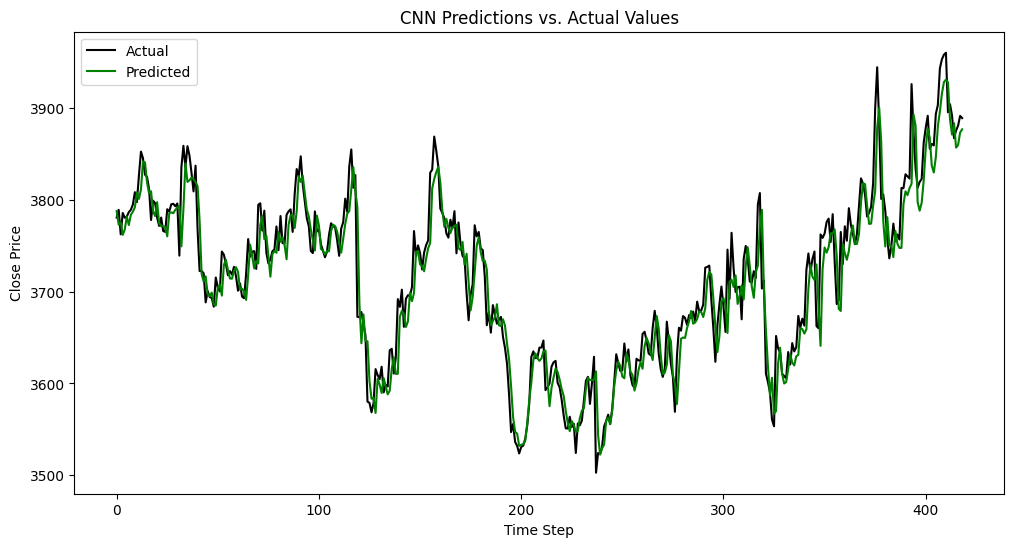

In [8]:
predictions = model.predict(X)

# Inverse transform the predictions and actual values to get original scale
predictions = scaler.inverse_transform(predictions)
y_original = scaler.inverse_transform(y.reshape(-1, 1))

# print loss
loss = model.evaluate(X, y)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_original, predictions)

# Calculate the R-squared (R2)
r2 = r2_score(y_original, predictions)

# Print the results
print(f"Test Loss: {loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(y_original, label='Actual', color='black')
plt.plot(predictions, label='Predicted', color='green')
plt.legend()
plt.title('CNN Predictions vs. Actual Values')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.show()